# Analytical Solutions to 2nd-order ODEs

Let's first focus on simple analytical solutions for 2nd-order ODEs. As before, let's categorize problems based on their solution approach.

In [1]:
# import libraries for numerical functions and plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300

## Solution by direct integration

If you have a 2nd-order ODE of this form:
\begin{equation}
\frac{d^2 y}{dx^2} = f(x)
\end{equation}
then you can solve by **direct integration**.

For example, let's say we are trying to solve for the deflection of a cantilever beam $y(x)$ with a force $P$ at the end, where $E$ is the modulus and $I$ is the moment of intertia, and the initial conditions are $y(0)=0$ and $y^{\prime}(0) = 0$:

![Cantilever beam with force at end](../../images/cantilever.png "Cantilever beam")

\begin{align}
\frac{d^2 y}{dx^2} &= \frac{-P (L-x)}{EI} \\
\frac{d}{dx} \left(\frac{dy}{dx}\right) &= \frac{-P}{EI} (L-x) \\
\int d \left(\frac{dy}{dx}\right) &= \frac{-P}{EI} \int (L-x) dx \\
y^{\prime} = \frac{dy}{dx} &= \frac{-P}{EI} \left(Lx - \frac{x^2}{2}\right) + C_1 \\
\int dy &= \int \left( \frac{-P}{EI} \left(Lx - \frac{x^2}{2}\right) + C_1 \right) dx \\
y(x) &= \frac{-P}{EI} \left(\frac{L}{2} x^2 - \frac{1}{6} x^3\right) + C_1 x + C_2
\end{align}
That is our general solution; we can obtain the specific solution by applying our two initial conditions:
\begin{align}
y(0) &= 0 = C_2 \\
y^{\prime}(0) &= 0 = C_1 \\
\therefore y(x) &= \frac{P}{EI} \left( \frac{x^3}{6} - \frac{L x^2}{2} \right)
\end{align}

## Solution by substitution

If we have a 2nd-order ODE of this form:
\begin{equation}
\frac{d^2 y}{dx^2} = f(x, y^{\prime})
\end{equation}
then we can solve by **substitution**, meaning by substituting a new variable for $y^{\prime}$. (Notice that $y$ itself does not show up in the ODE.)

Let's substitute $u$ for $y^{\prime}$ in the above ODE:
\begin{align}
u &= y^{\prime} \\
u^{\prime} &= y^{\prime\prime} \\
\rightarrow u^{\prime} &= f(f, u)
\end{align}
Now we have a 1st-order ODE! Then, we can apply the methods previously discussed to solve this; once we find $u(x)$, we can integrate that once more to get $y(x)$.

### Example: falling object

For example, consider a falling mass where we are solving for the downward distance as a function of time, $y(t)$, that is experiencing the force of gravity downward and a drag force upward. It starts at some reference point so $y(0) = 0$, and has a zero initial downward velocity: $y^{\prime}(0) = 0$. The governing equation is:
\begin{equation}
m \frac{d^2 y}{dt^2} = mg - c \left( \frac{dy}{dt} \right)^2
\end{equation}
where $m$ is the mass, $g$ is acceleration due to gravity, and $c$ is the drag proportionality constant.
We can substitute $V$ for $y^{\prime}$, which gives us a first-order ODE:
\begin{align}
\text{let} \quad \frac{dy}{dt} = V \\
\rightarrow m \frac{dV}{dt} &= mg - c V^2 \\
\end{align}
Then, we can solve this for $V(t)$ using our initial condition for velocity $V(0) = 0$. Once we have that, we can integrate once more:
\begin{equation}
y(t) = \int V(t) dt
\end{equation}
and apply our initial condition for position, $y(0) = 0$, to obtain $y(t)$.

Here is the full process:
\begin{align}
\frac{dV}{dt} &= g - \frac{c}{m} V^2 \\
\frac{dV}{g - \frac{c}{m} V^2} &= dt \\
\frac{m}{c} \int \frac{dV}{a^2 - V^2} &= \int dt = t + \bar{c}, \quad \text{where} \quad a = \sqrt{\frac{mg}{c}} \\
\frac{m}{c} \frac{1}{a} \tanh^{-1} \left(\frac{V}{a}\right) &= t + c_1 \\
V &= a \tanh \left( \frac{a c}{m} t + c_1 \right) \\
\therefore V(t) &= \sqrt{\frac{mg}{c}} \tanh \left(\sqrt{\frac{gc}{m}} t + c_1\right)
\end{align}
Applying the initial condition for velocity, $V(0) = 0$:
\begin{align}
V(0) &= 0 = \sqrt{\frac{mg}{c}} \tanh \left(0 + c_1\right) \\
\therefore c_1 &= 0 \\
V(t) &= \sqrt{\frac{mg}{c}} \tanh \left(\sqrt{\frac{gc}{m}} t\right)
\end{align}
Then, to get $y(t)$, we just need to integrate once more:
\begin{align}
\frac{dy}{dt} = V(t) &= \sqrt{\frac{mg}{c}} \tanh \left(\sqrt{\frac{gc}{m}} t\right) \\
\int dy &= \sqrt{\frac{mg}{c}} \int \tanh \left(\sqrt{\frac{gc}{m}} t\right) dt \\
y(t) &= \sqrt{\frac{mg}{c}} \sqrt{\frac{m}{gc}} \log\left(\cosh\left(\sqrt{\frac{gc}{m}} t\right)\right) + c_2 \\
\rightarrow y(t) &= \frac{m}{c} \log\left(\cosh\left(\sqrt{\frac{gc}{m}} t\right)\right) + c_2
\end{align}
Finally, we can apply the initial condition for position, $y(0) = 0$, to get our solution:
\begin{align}
y(0) &= 0 = \frac{m}{c} \log\left(\cosh\left(0\right)\right) + c_2 = c_2 \\
\rightarrow c_2 &= 0 \\
y(t) &= \frac{m}{c} \log\left(\cosh\left(\sqrt{\frac{gc}{m}} t\right)\right)
\end{align}

### Example: catenary problem

The catenary problem describes the shape of a hanging chain or rope fixed between two points. (It was also a favorite of one of my professors, [Joe Prahl](https://en.wikipedia.org/wiki/Joseph_M._Prahl), and I like to teach it as an example in his honor.) The downward displacement of the hanging string/chain/rope as a function of horizontal position, $y(x)$, is governed by the equation
\begin{equation}
y^{\prime\prime} = \sqrt{1 + (y^{\prime})^2}
\end{equation}

![Catenary problem (hanging rope/chain)](../../images/catenary.png "Catenary problem")

This is actually a **boundary value problem**, with the boundary conditions for the displacement at one side $y(0) = 0$ and that the slope is zero in the middle: $\frac{dy}{dx}\left(\frac{L}{2}\right) = 0$. (Please note that I have skipped the derivation of the governing equation, and left some details out.)

We can solve this via substitution, by letting a new variable $u = y^{\prime}$; then, $u^{\prime} = \frac{du}{dx} = y^{\prime\prime}$. This gives is a first-order ODE, which we can integrate:
\begin{align}
\frac{du}{dx} &= \sqrt{1 + u^2} \\
\int \frac{du}{\sqrt{1 + u^2}} &= \int dx \\
\sinh^{-1}(u) &= x + c_1, \quad \text{where } \sinh(x) = \frac{e^x - e^{-x}}{2} \\
u(x) &= \sinh(x + c_1)
\end{align}

Then, we can integrate once again to get $y(x)$:
\begin{align}
\frac{dy}{dx} &= u(x) = \sinh(x + c_1) \\
\int dy &= \int \sinh(x + c_1) dx = \int \left(\sinh(x)\cosh(c_1) + \cosh(x)\sinh(c_1)\right)dx \\
y(x) &= \cosh(x)\cosh(c_1) + \sinh(x)\sinh(c_1) + c_2 \\
\rightarrow y(x) &= \cosh(x + c_1) + c_2
\end{align}
This is the general solution to the catenary problem, and applies to any boundary conditions.

For our specific case, we can apply the boundary conditions and find the particular solution, though it involves some algebra...:
\begin{align}
y(0) &= 0 = \cosh(c_1) + c_2 \\
\frac{dy}{dx}\left(\frac{L}{2}\right) &= u(0) = \sinh \left(\frac{L}{2} + c_1\right) \\
\rightarrow c_1 &= -\frac{L}{2} \\
0 &= \cosh \left( -\frac{L}{2} \right) + c_2 \\
\rightarrow c_2 &= -\cosh\left( -\frac{L}{2} \right) = -\cosh\left(\frac{L}{2} \right)
\end{align}
So, the overall solution for the catenary problem with the given boundary conditions is
\begin{equation}
y(x) = \cosh \left(x - \frac{L}{2}\right) - \cosh\left( \frac{L}{2} \right)
\end{equation}

Let's see what this looks like:

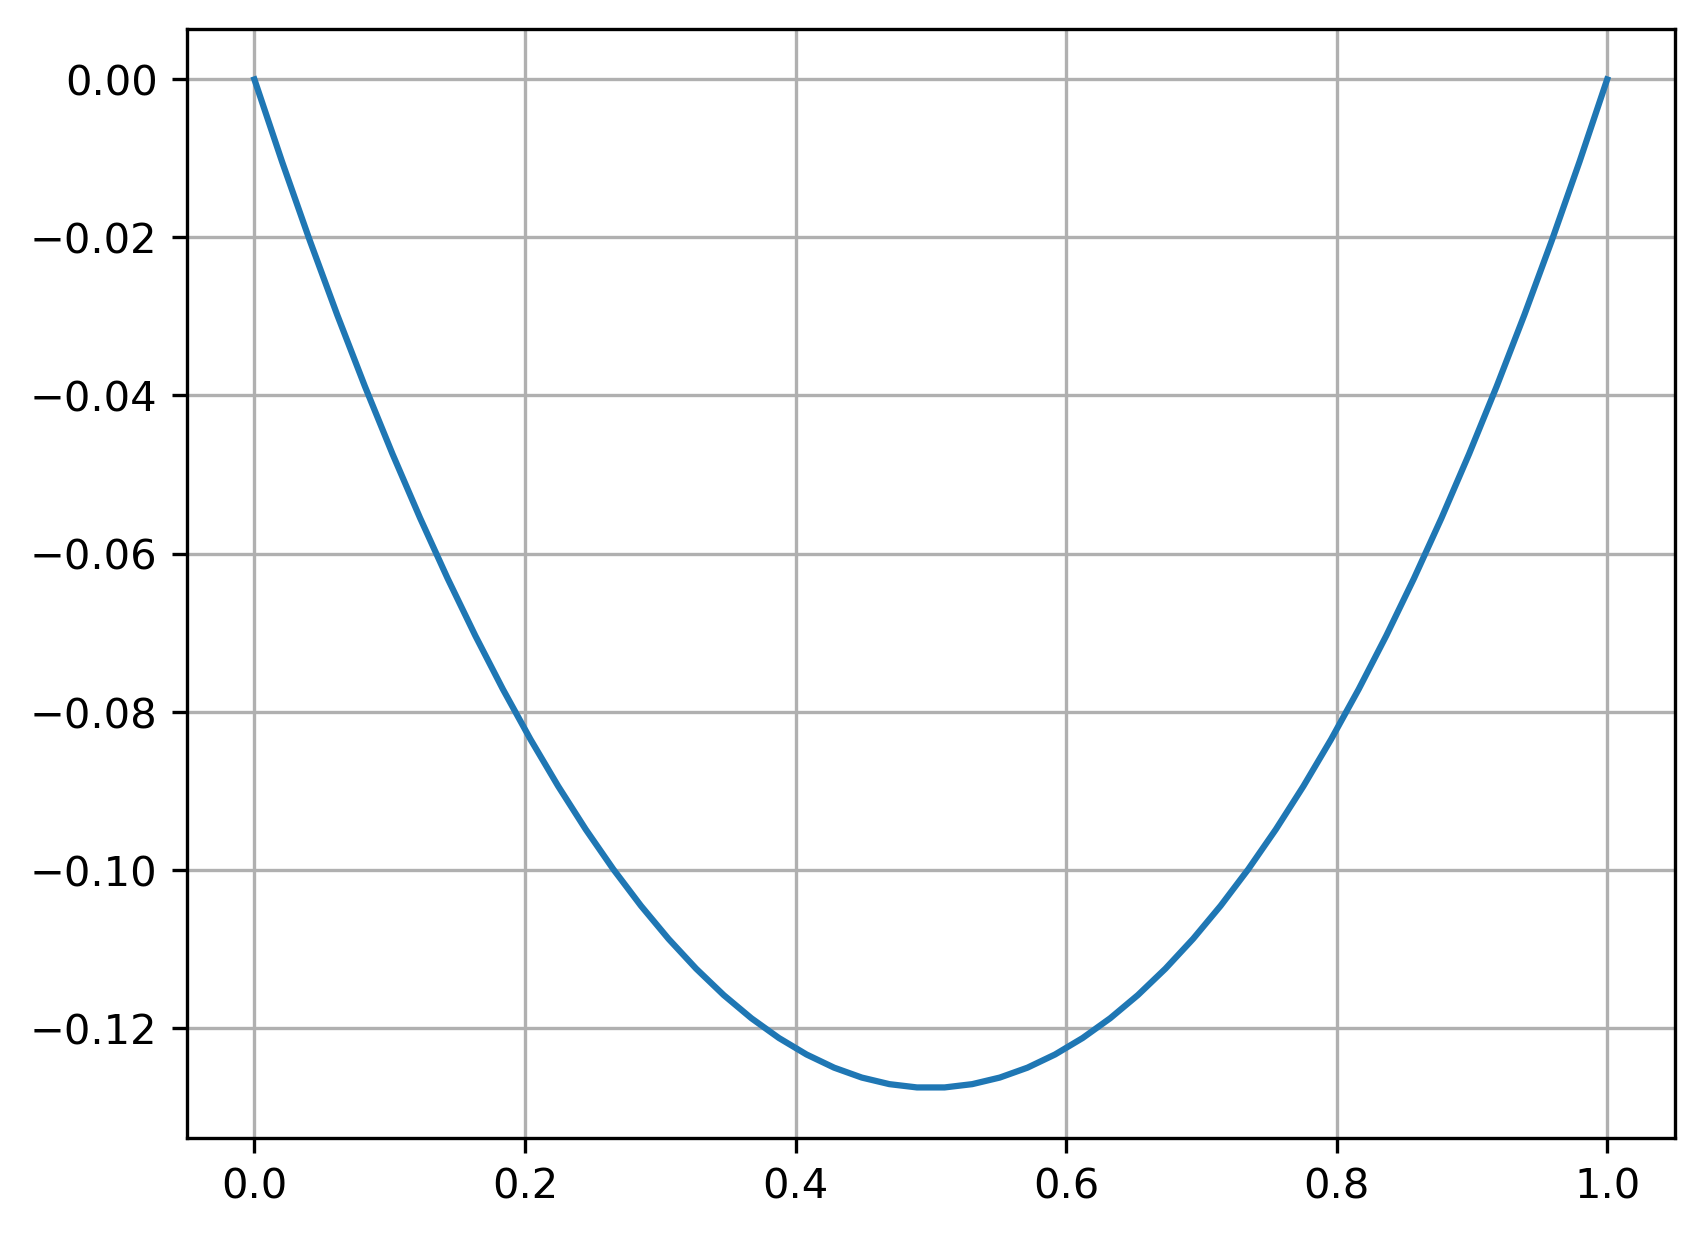

In [5]:
length = 1.0
x = np.linspace(0, 1)
y = np.cosh(x - length/2) - np.cosh(length/2)
plt.plot(x, y)
plt.grid(True)
plt.show()

Please note that I've made some simplifications in the above work, and skipped the details of how the ODE is derived. In general, the solution for the shape is
\begin{equation}
y(x) = C \cosh \frac{x + c_1}{C} + c_2
\end{equation}
where you would solve for the constants $C$, $c_1$, and $c_2$ using the constraints:
\begin{align}
\int_{x_a}^{x_b} \sqrt{1 + (y^{\prime})^2} dx &= L \\
y(x_a) &= y_a \\
y(x_b) &= y_b \;,
\end{align}
where $L$ is the length of the rope/chain.

You can read more about the catenary problem here (for example): <http://euclid.trentu.ca/aejm/V4N1/Chatterjee.V4N1.pdf>

## Homogeneous 2nd-order ODEs

An important category of 2nd-order ODEs are those that look like
\begin{equation}
y^{\prime\prime} + p(x) y^{\prime} + q(x) y = 0
\end{equation}
"Homogeneous" means that the ODE is unforced; that is, the right-hand side is zero.

Depending on what $p(x)$ and $q(x)$ look like, we have a few different solution approaches:

- constant coefficients: $y^{\prime\prime} + a y^{\prime} + by = 0$
- Euler-Cauchy equations: $x^2 y^{\prime\prime} + axy^{\prime} + by = 0$
- Series solutions

First, let's talk about the characteristics of linear, homogeneous 2nd-order ODEs:

### Solutions have two parts: 
Solutions have two parts: $y(x) = c_1 y_1 + c_2 y_2$, where $y_1$ and $y_2$ are each a basis of the solution.

### Linearly independent:

The two parts of the solution $y_1$ and $y_2$ are linearly independent.

One way of defining this is that $a_1 y_1 + a_2 y_2 = 0$ only has the trivial solution $a_1=0$ and $a_2=0$.

Another way of thinking about this is that $y_1$ and $y_2$ are linearly *dependent* if one is a multiple of the other, like $y_1 = x$ and $y_2 = 5x$. This *cannot* be solutions to a linear, homogeneous ODE.

### Both parts satisfy the ODE:

$y_1$ and $y_2$ each satisfy the ODE. Meaning, you can plug each of them into the ODE for $y$ and obtain 0.

However, we need both parts together to fully solve the ODE.

### Reduction of order: 

If $y_1$ is known, we can get $y_2$ by **reduction of order**. Let $y_2 = u y_1$, where $u$ is some unknown function of $x$. Then, put $y_2$ into the ODE $y^{\prime}{\prime} + p(x) y^{\prime} + q(x) y = 0$:
\begin{align}
y_2 &= u y_1 \\
y_2^{\prime} &= u y_1^{\prime} + u^{\prime} y_1 \\
y_2^{\prime\prime} &= 2 u^{\prime} y_1^{\prime} + u^{\prime\prime} y_1 + u y_1^{\prime\prime} \\
\rightarrow u^{\prime\prime} &= - \left[ p(x) + \left(\frac{2 y_1^{\prime}}{y_1}\right) \right] u^{\prime}
\text{or, } u^{\prime\prime} &= - \left( g(x) \right) u^{\prime}
\end{align}
Now, we have an ODE with only $u^{\prime\prime}$, $u^{\prime}$, and some function $g(x)$—so we can solve by substitution! Let $u^{\prime} = v$, and then we have $v^{\prime} = -g(x) v$:
\begin{align}
\frac{dv}{dx} &= - \left( p(x) + \frac{2 y_1^{\prime}}{y_1} \right) v \\
\int \frac{dv}{v} &= - \int \left(p(x) + \frac{2 y_1^{\prime}}{y_1} \right) dx \\
\text{Recall } 2 \frac{d}{dx} \left( \ln y_1 \right) &= 2 \frac{y_1^{\prime}}{y_1} \\
\therefore \int \frac{dv}{v} &= - \int \left(p(x) + 2 \frac{d}{dx} \left( \ln y_1 \right) \right) dx \\
\ln v &= -\int p(x) dx - 2 \ln y_1 \\
\rightarrow v &= \frac{\exp\left( -\int p(x)dx \right)}{y_1^2}
\end{align}

So, the actual solution procedure is then:

  1. Solve for $v$: $v = \frac{\exp\left( -\int p(x)dx \right)}{y_1^2}$
  2. Solve for $u$: $u = \int v dx$
  3. Get $y_2$: $y_2 = u y_1$
  
Here's an example, where we know one part of the solution $y_1 = e^{-x}$:
\begin{align}
y^{\prime\prime} + 2 y^{\prime} + y &= 0 \\
\text{Step 1:} \quad v = \frac{\exp \left( -\int 2dx \right)}{ \left(e^{-x}\right)^2} = \frac{e^{-2x}}{e^{-2x}} &= 1 \\
\text{Step 2:} \quad u = \int v dx = \int 1 dx &= x \\
\text{Step 3:} \quad y_2 &= x e^{-x}
\end{align}
Then, the general solution to the ODE is $y(x) = c_1 e^{-x} + c_2 x e^{-x}$.